# Boundary Scoring Patterns in T20 Cricket
T20 cricket, with its explosive nature and emphasis on scoring runs quickly, has transformed the landscape of the game. A crucial aspect of this rapid run-scoring is the art of hitting boundaries – fours and sixes. Understanding the patterns and variations in boundary scoring is essential for players, coaches, and analysts alike.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../Data/selected_data/processed_data.csv')
data.describe()

,runs_by_bat,extra_runs,total_runs_delivery,current_team_total,runs_remain,batter_runs,balls_faced,wickets_fallen,delivery,over,innings,year,month,won,final_team_total
count,217242.000000,217242.000000,217242.000000,217242.000000,217242.000000,217242.000000,217242.000000,217242.000000,217242.000000,217242.000000,217242.000000,217242.000000,217242.000000,217242.000000,217242.000000
mean,1.224077,0.070336,1.294414,73.723217,43.597177,16.977679,13.290975,2.679233,3.452233,9.062437,1.476740,2016.900839,6.480731,0.449743,153.933991
std,1.600601,0.348809,1.588189,48.397965,58.257686,17.765433,11.416722,2.213450,1.718068,5.655411,0.503005,5.015507,3.585855,0.551915,34.386642
min,0.000000,0.000000,0.000000,0.000000,-17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2005.000000,1.000000,-1.000000,1.000000
25%,0.000000,0.000000,0.000000,34.000000,-1.000000,4.000000,4.000000,1.000000,2.000000,4.000000,1.000000,2013.000000,3.000000,0.000000,132.000000
50%,1.000000,0.000000,1.000000,69.000000,-1.000000,11.000000,10.000000,2.000000,3.000000,9.000000,1.000000,2018.000000,7.000000,0.000000,153.000000
75%,1.000000,0.000000,1.000000,108.000000,88.000000,25.000000,19.000000,4.000000,5.000000,14.000000,2.000000,2021.000000,10.000000,1.000000,176.000000
max,7.000000,5.000000,8.000000,278.000000,272.000000,172.000000,76.000000,11.000000,7.000000,19.000000,6.000000,2024.000000,12.000000,1.000000,278.000000


In [4]:
data["won"] = data["winning_team"] == data["batting_team"]

# selecting the needed columns
columns_needed = ['match_id', 'innings', 'runs_by_bat', 'won', 'year', 'over', 'delivery']
boundary_data = data[columns_needed]

# keep only boundaries
boundary_data = boundary_data[boundary_data["runs_by_bat"].isin([4, 6])]

boundary_data.head()

,match_id,innings,runs_by_bat,won,year,over,delivery
10,Australia_Sri Lanka_2017-02-17,1,4,False,2017,1,5.0
16,Australia_Sri Lanka_2017-02-17,1,4,False,2017,2,5.0
22,Australia_Sri Lanka_2017-02-17,1,4,False,2017,3,5.0
26,Australia_Sri Lanka_2017-02-17,1,4,False,2017,4,3.0
27,Australia_Sri Lanka_2017-02-17,1,4,False,2017,4,4.0


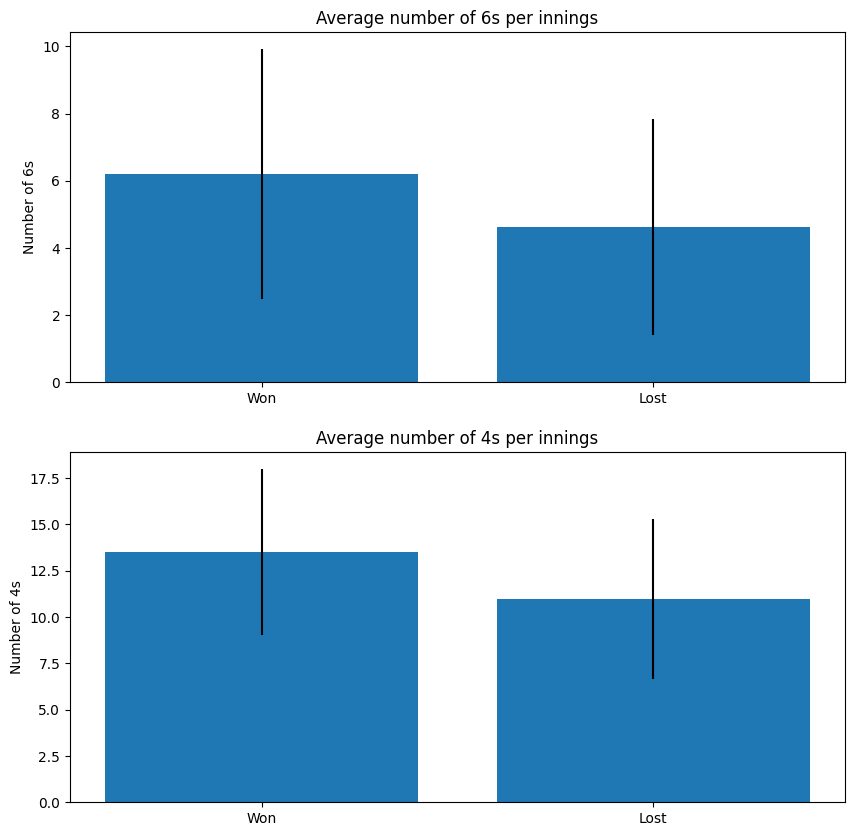

In [5]:
# calculate the number of 6s and 4s separately in each match and innings and compare with the winning team
gp = boundary_data.groupby(['match_id', 'innings', 'won'])
# get the number of 6s
sixes = gp.apply(lambda x: (x["runs_by_bat"] == 6).sum())

# average number of 6s in innings where team has won
sixes_won_mean = sixes[sixes.index.get_level_values('won')].mean()
sixes_won_std = sixes[sixes.index.get_level_values('won')].std()

sixes_lost_mean = sixes[~sixes.index.get_level_values('won')].mean()
sixes_lost_std = sixes[~sixes.index.get_level_values('won')].std()

# get the number of 4s
fours = gp.apply(lambda x: (x["runs_by_bat"] == 4).sum())
fours_won_mean = fours[fours.index.get_level_values('won')].mean()
fours_won_std = fours[fours.index.get_level_values('won')].std()

fours_lost_mean = fours[~fours.index.get_level_values('won')].mean()
fours_lost_std = fours[~fours.index.get_level_values('won')].std()

# plot the results
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].bar(["Won", "Lost"], [sixes_won_mean, sixes_lost_mean], yerr=[sixes_won_std, sixes_lost_std])
ax[0].set_title("Average number of 6s per innings")
ax[0].set_ylabel("Number of 6s")

ax[1].bar(["Won", "Lost"], [fours_won_mean, fours_lost_mean], yerr=[fours_won_std, fours_lost_std])
ax[1].set_title("Average number of 4s per innings")
ax[1].set_ylabel("Number of 4s")

plt.show()




In [6]:
# Construct a new dataframe with the number of 4s and 6s as columns, and entry for each over in each innings of a match

columns_needed = ['match_id', 'innings', 'runs_by_bat', 'won', 'year', 'over']
boundary_over_data = data[columns_needed]
# offset the over by 1 to start from 1
boundary_over_data['over'] = boundary_over_data['over'] + 1

# group by match, innings, over and calculate the number of 4s and 6s
gp = boundary_over_data.groupby(['match_id', 'innings', 'over', 'won'])
boundary_over_data = gp.apply(lambda x: pd.Series({'4s': (x["runs_by_bat"] == 4).sum(), '6s': (x["runs_by_bat"] == 6).sum()}))
boundary_over_data = boundary_over_data.reset_index()
boundary_over_data.head()



C:\Users\kaush\AppData\Local\Temp\ipykernel_27920\3322769627.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boundary_over_data['over'] = boundary_over_data['over'] + 1


,match_id,innings,over,won,4s,6s
0,Afghanistan_Bangladesh_2018-06-03,1,1,True,2,0
1,Afghanistan_Bangladesh_2018-06-03,1,2,True,0,0
2,Afghanistan_Bangladesh_2018-06-03,1,3,True,1,0
3,Afghanistan_Bangladesh_2018-06-03,1,4,True,0,0
4,Afghanistan_Bangladesh_2018-06-03,1,5,True,2,1


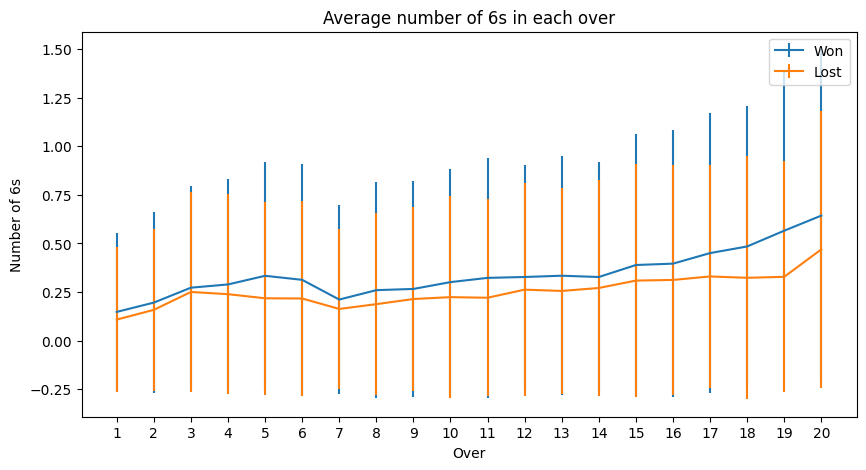

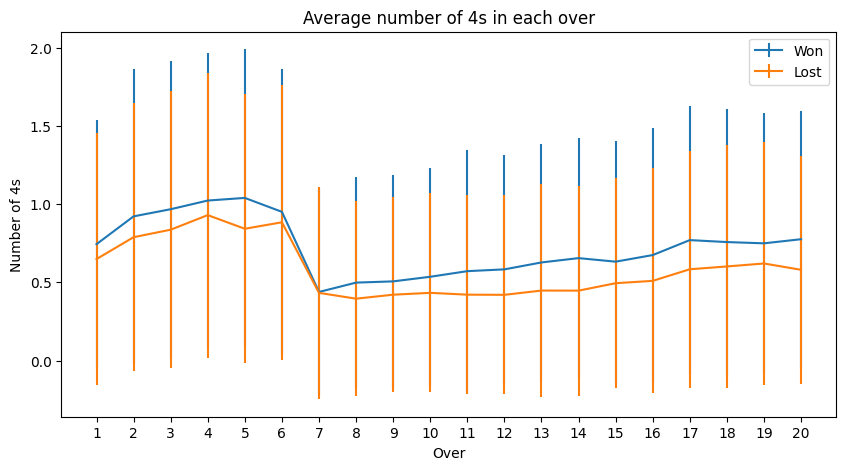

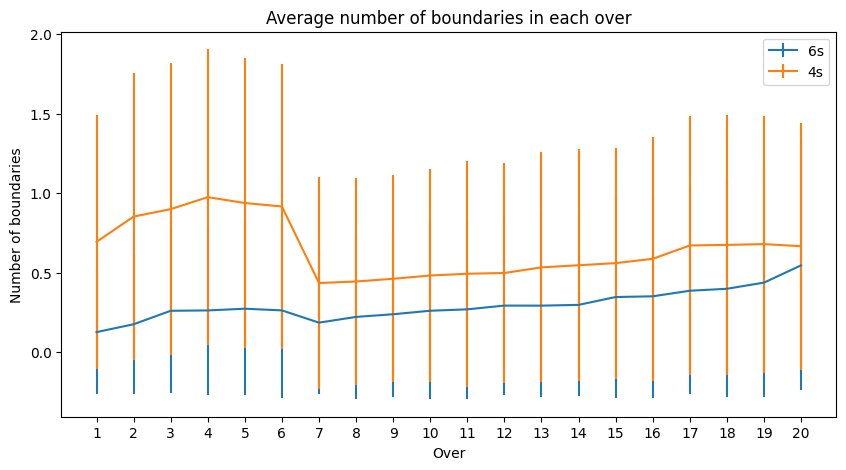

In [7]:
# calculate the average number of 4s and 6s in each over

gp = boundary_over_data.groupby(['over', 'won'])['6s']



sixes_mean = gp.mean().unstack()
sixes_std = gp.std().unstack()

gp = boundary_over_data.groupby(['over', 'won'])['4s']
fours_mean = gp.mean().unstack()
fours_std = gp.std().unstack()

plt.figure(figsize=(10, 5))
plt.errorbar(sixes_mean.index, sixes_mean[True], yerr=sixes_std[True], label="Won")
plt.errorbar(sixes_mean.index, sixes_mean[False], yerr=sixes_std[False], label="Lost")
plt.xlabel("Over")
plt.ylabel("Number of 6s")
plt.title("Average number of 6s in each over")
plt.xticks(np.arange(1, 21))
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.errorbar(fours_mean.index, fours_mean[True], yerr=fours_std[True], label="Won")
plt.errorbar(fours_mean.index, fours_mean[False], yerr=fours_std[False], label="Lost")
plt.xlabel("Over")
plt.ylabel("Number of 4s")
plt.title("Average number of 4s in each over")
plt.xticks(np.arange(1, 21))
plt.legend()
plt.show()


# combine the won and lost data into a single dataframe
gp = boundary_over_data.groupby(['over'])['6s']
sixes_mean = gp.mean()
sixes_std = gp.std()

gp = boundary_over_data.groupby(['over'])['4s']
fours_mean = gp.mean()
fours_std = gp.std()

plt.figure(figsize=(10, 5))
plt.errorbar(sixes_mean.index, sixes_mean, yerr=sixes_std, label="6s")
plt.errorbar(fours_mean.index, fours_mean, yerr=fours_std, label="4s")
plt.xlabel("Over")
plt.ylabel("Number of boundaries")
plt.title("Average number of boundaries in each over")
plt.xticks(np.arange(1, 21))
plt.legend()
plt.show()





In [8]:
# New dataframe with the number of 4s and 6s as columns, and entry for each delivery in each innings of a match
columns_needed = ['match_id', 'innings', 'runs_by_bat', 'won', 'delivery']
boundary_delivery_data = data[columns_needed]

# limit the delivery to 6 balls
# boundary_delivery_data['delivery'] = np.where(boundary_delivery_data['delivery'] > 6, 6, boundary_delivery_data['delivery'])

# group by match, innings, delivery and calculate the number of 4s and 6s
gp = boundary_delivery_data.groupby(['match_id', 'innings', 'delivery', 'won'])
boundary_delivery_data = gp.apply(lambda x: pd.Series({'4s': (x["runs_by_bat"] == 4).sum(), '6s': (x["runs_by_bat"] == 6).sum()}))
boundary_delivery_data = boundary_delivery_data.reset_index()
boundary_delivery_data.head(20)

,match_id,innings,delivery,won,4s,6s
0,Afghanistan_Bangladesh_2018-06-03,1,1.0,True,1,3
1,Afghanistan_Bangladesh_2018-06-03,1,2.0,True,3,3
2,Afghanistan_Bangladesh_2018-06-03,1,3.0,True,0,0
3,Afghanistan_Bangladesh_2018-06-03,1,4.0,True,3,1
4,Afghanistan_Bangladesh_2018-06-03,1,5.0,True,1,1
5,Afghanistan_Bangladesh_2018-06-03,1,6.0,True,3,1
6,Afghanistan_Bangladesh_2018-06-03,2,1.0,False,2,0
7,Afghanistan_Bangladesh_2018-06-03,2,2.0,False,0,0
8,Afghanistan_Bangladesh_2018-06-03,2,3.0,False,3,1
9,Afghanistan_Bangladesh_2018-06-03,2,4.0,False,3,0


delivery
0.0    0
1.0    3
2.0    3
3.0    0
4.0    1
5.0    1
6.0    1
7.0    0
Name: 6s, dtype: int64
delivery
0.0    0.012739
1.0    0.880802
2.0    0.952532
3.0    0.955121
4.0    0.914331
5.0    0.845503
6.0    0.797985
7.0    0.000000
Name: 6s, dtype: float64


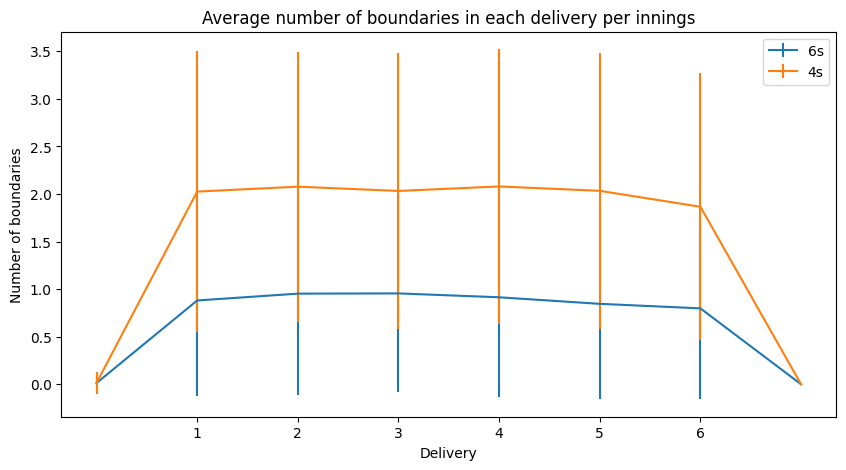

In [9]:
# calculate the average number of 4s and 6s in each delivery
gp = boundary_delivery_data.groupby(['delivery'])['6s']
print(gp.first())
sixes_mean = gp.mean()
sixes_std = gp.std()
print(sixes_mean)

gp = boundary_delivery_data.groupby(['delivery'])['4s']
fours_mean = gp.mean()
fours_std = gp.std()

plt.figure(figsize=(10, 5))
plt.errorbar(sixes_mean.index, sixes_mean, yerr=sixes_std, label="6s")
plt.errorbar(fours_mean.index, fours_mean, yerr=fours_std, label="4s")
plt.xlabel("Delivery")
plt.ylabel("Number of boundaries")
plt.title("Average number of boundaries in each delivery per innings")
plt.xticks(np.arange(1, 7))
plt.legend()
plt.show()

    over  delivery  6s
0      0       0.0   1
1      0       1.0  20
2      0       2.0  35
3      0       3.0  43
4      0       4.0  51
5      0       5.0  41
6      0       6.0  50
7      1       0.0   0
8      1       1.0  36
9      1       2.0  63
10     1       3.0  61
11     1       4.0  55
12     1       5.0  52
13     1       6.0  62
14     2       0.0   0
15     2       1.0  85
16     2       2.0  81
17     2       3.0  94
18     2       4.0  86
19     2       5.0  67


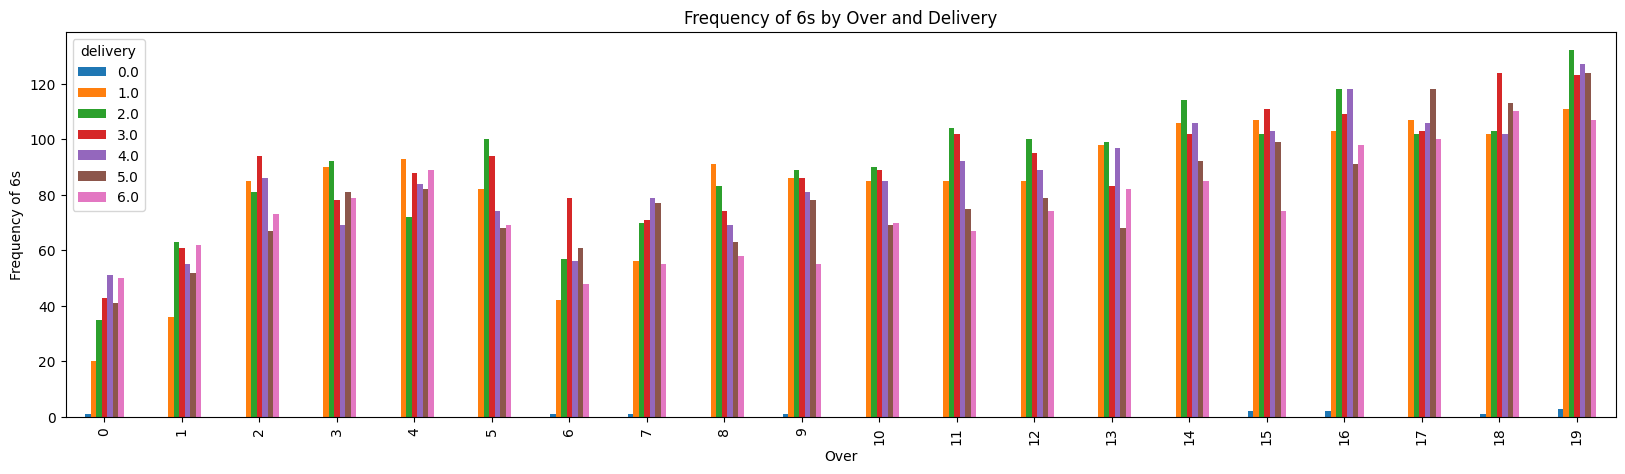

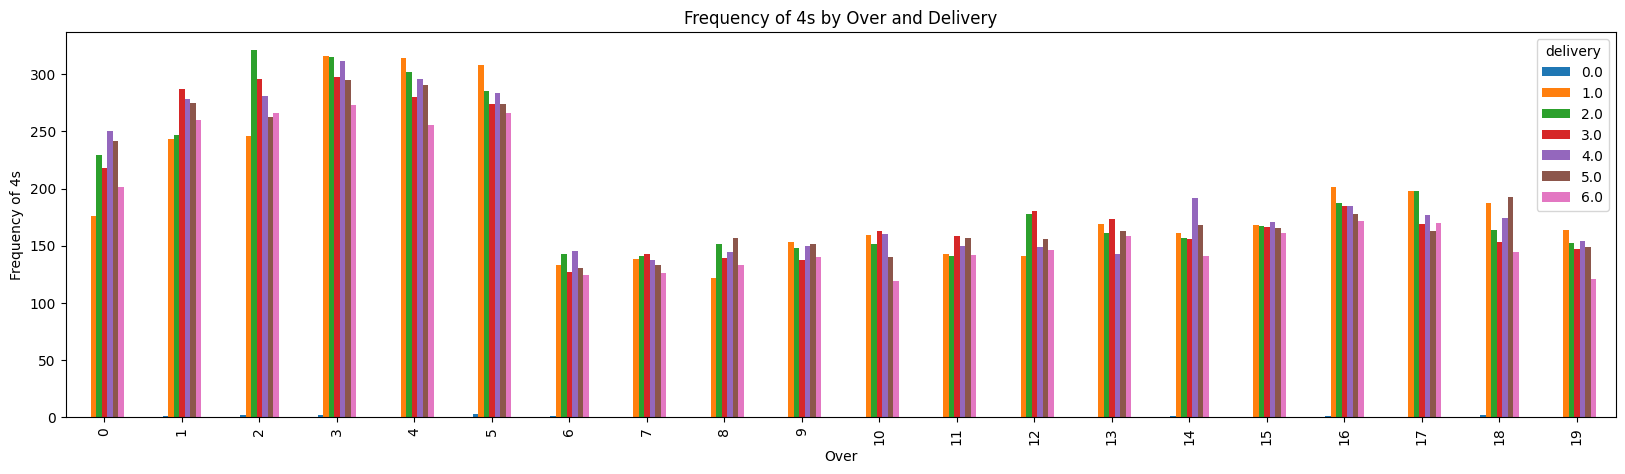

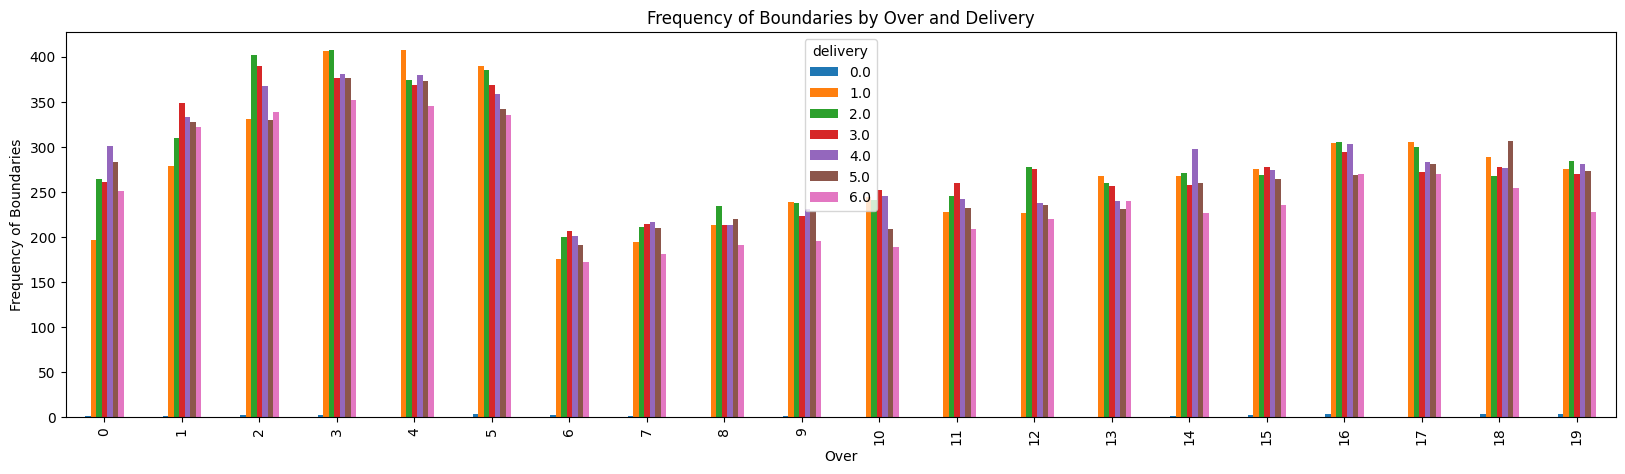

In [10]:
# Objective: Stacked bar plot showing the number of 4s and 6s in each delivery of the innings for each over
# using the boundary_data

# group by match, innings, over, delivery and calculate the number of 4s and 6s

#limit the delivery to 6 balls
boundary_data['delivery'] = np.where(boundary_data['delivery'] > 6, 6, boundary_data['delivery'])

gp = boundary_data.groupby(['over', 'delivery'])


gp = gp.apply(lambda x: pd.Series({'4s': (x["runs_by_bat"] == 4).sum(), '6s': (x["runs_by_bat"] == 6).sum()}))
gp = gp.reset_index()
print(gp[['over', 'delivery', '6s']].head(20))

# combine over and delivery to get a single value for each delivery
gp['over.delivery'] = gp['over'] + 0.6 * gp['delivery']

# combine 4s and 6s into a single column
gp['boundaries'] = gp['4s'] + gp['6s']

# plot the results
# the x-axis will be the over 
# the y-axis will be the number of 6s
# for each over, we will have 6 different bars, one for each delivery
# the height of the bar will be the number of 6s



# Reshape the data into a format suitable for plotting
plot_data = gp.set_index(['over', 'delivery'])['6s'].unstack().fillna(0)

# Plot the data
fig, ax = plt.subplots(figsize=(20, 5))
plot_data.plot(kind='bar', ax=ax)

# Set the title and axis labels
ax.set_title('Frequency of 6s by Over and Delivery')
ax.set_xlabel('Over')
ax.set_ylabel('Frequency of 6s')

plt.show()


# Similarly, we can plot the number of 4s in each delivery of the innings for each over
plot_data = gp.set_index(['over', 'delivery'])['4s'].unstack().fillna(0)

# Plot the data
fig, ax = plt.subplots(figsize=(20, 5))
plot_data.plot(kind='bar', ax=ax)

# Set the title and axis labels
ax.set_title('Frequency of 4s by Over and Delivery')
ax.set_xlabel('Over')
ax.set_ylabel('Frequency of 4s')
plt.show()


# Similarly, we can plot the number of boundaries in each delivery of the innings for each over
plot_data = gp.set_index(['over', 'delivery'])['boundaries'].unstack().fillna(0)

# Plot the data
fig, ax = plt.subplots(figsize=(20, 5))
plot_data.plot(kind='bar', ax=ax)

# Set the title and axis labels
ax.set_title('Frequency of Boundaries by Over and Delivery')
ax.set_xlabel('Over')
ax.set_ylabel('Frequency of Boundaries')
plt.show()
